# Codificar variables

## Categóricas

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from category_encoders import TargetEncoder

# Cargar el dataset
df = pd.read_excel('df_objetivo/df_objetivo_imputado_2.xlsx')

# Variable objetivo
target = "RIESGO_DESERCION"

"""
* Binaricé DICAPACIDAD a cambiando todos los registros de alguna dicapacidad a simplemente SI
para poder aplicar label encoding a las categorías binarias SI/NO

* En la columna NODO_INICIO, el valor Estudiantes que deben nivelar - Excepción COVID y alguna cantidad de créditos, 
lo deje simplemente "Estudiantes que deben nivelar - Excepción COVID" para que solo hayan 3 categorías en NODO_INICIO
y aplicarle entonces one-hot encoding
"""


# 1. Label Encoding para variables binarias
label_vars = ["GENERO", "NACIONALIDAD", "VICTIMAS_DEL_CONFLICTO", "DISCAPACIDAD"]
le = LabelEncoder()
for col in label_vars:
    df[col] = le.fit_transform(df[col])

# 2. One-Hot Encoding para variables de baja cardinalidad
onehot_vars = ["PLAN", "SUBACCESO", "CARACTER_COLEGIO", "NODO_INICIO"]
df = pd.get_dummies(df, columns=onehot_vars, drop_first=True)

# 3. Target Encoding para variables de alta cardinalidad
target_encoding_vars = ["APERTURA", "MUNICIPIO_NACIMIENTO", "MUNICIPIO_RESIDENCIA_FAM"]
te = TargetEncoder()
df[target_encoding_vars] = te.fit_transform(df[target_encoding_vars], df[target])

# Verificar transformación
print("Columnas finales:", df.columns.tolist())


Columnas finales: ['AVANCE_CARRERA', 'APERTURA', 'GENERO', 'EDAD', 'PAPA', 'PBM_CALCULADO', 'ESTRATO', 'MUNICIPIO_NACIMIENTO', 'NACIONALIDAD', 'VICTIMAS_DEL_CONFLICTO', 'DISCAPACIDAD', 'MUNICIPIO_RESIDENCIA_FAM', 'PUNTAJE_ADMISION', 'ATRASO_PORCENTUAL', 'RIESGO_DESERCION', 'PLAN_ESTADÍSTICA', 'PLAN_GEOGRAFÍA', 'PLAN_GESTIÓN CULTURAL Y COMUNICATIVA', 'PLAN_INGENIERÍA BIOLÓGICA', 'PLAN_INGENIERÍA MECATRÓNICA', 'SUBACCESO_PAES - POBLACION NEGRA, AFROCOLOMBIANA, PALENQUERA Y RAIZAL', 'SUBACCESO_PROGRAMA DE ADMISIÓN ESPECIAL PARA LOS PROGRAMAS DE PREGRADO SEDE LA PAZ', 'SUBACCESO_REGULAR DE PREGRADO', 'SUBACCESO_VÍCTIMAS DEL CONFLICTO ARMADO EN COLOMBIA', 'CARACTER_COLEGIO_Plantel Oficial', 'CARACTER_COLEGIO_Plantel Privado', 'NODO_INICIO_Estudiantes que deben nivelar 3 asignaturas', 'NODO_INICIO_Estudiantes que no deben nivelar']


In [8]:
df

,AVANCE_CARRERA,APERTURA,GENERO,EDAD,PAPA,PBM_CALCULADO,ESTRATO,MUNICIPIO_NACIMIENTO,NACIONALIDAD,VICTIMAS_DEL_CONFLICTO,...,PLAN_INGENIERÍA BIOLÓGICA,PLAN_INGENIERÍA MECATRÓNICA,"SUBACCESO_PAES - POBLACION NEGRA, AFROCOLOMBIANA, PALENQUERA Y RAIZAL",SUBACCESO_PROGRAMA DE ADMISIÓN ESPECIAL PARA LOS PROGRAMAS DE PREGRADO SEDE LA PAZ,SUBACCESO_REGULAR DE PREGRADO,SUBACCESO_VÍCTIMAS DEL CONFLICTO ARMADO EN COLOMBIA,CARACTER_COLEGIO_Plantel Oficial,CARACTER_COLEGIO_Plantel Privado,NODO_INICIO_Estudiantes que deben nivelar 3 asignaturas,NODO_INICIO_Estudiantes que no deben nivelar
0,80.9,0.113822,0,22,3.900000,5,2,0.115150,0,0,...,0,0,0,1,0,0,1,0,0,0
1,84.4,0.113822,0,23,4.100000,1,1,0.143713,0,0,...,0,0,0,1,0,0,1,0,1,0
2,91.5,0.113822,1,37,3.800000,3,1,0.144068,0,0,...,0,0,0,1,0,0,1,0,1,0
3,63.1,0.069930,1,21,3.700000,2,1,0.134335,0,0,...,0,0,0,1,0,0,1,0,1,0
4,69.8,0.069930,1,22,3.700000,1,1,0.143713,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,22.0,0.163458,0,30,4.000000,4,2,0.115150,0,1,...,0,0,0,0,0,1,1,0,1,0
1279,4.5,0.072953,1,21,4.100000,6,2,0.144603,0,0,...,0,0,0,0,1,0,1,0,1,0
1280,4.7,0.072953,0,36,3.800000,32,1,0.112613,0,0,...,0,0,0,0,1,0,1,0,1,0
1281,0.0,0.282778,0,20,3.953988,2,1,0.143713,0,1,...,0,0,0,0,0,1,1,0,1,0


## Numércias

In [13]:
import pandas as pd
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
)

# Cargar el DataFrame codificado
# df = pd.read_excel("df_objetivo_imputado_transformado.xlsx")  # o usa el DataFrame resultante del paso anterior

# Variables numéricas y su estrategia de escalado
scaling_strategies = {
    "AVANCE_CARRERA": MinMaxScaler(),
    "EDAD": ("power_standard",),  # Power + Standard
    # "NUMERO_MATRICULAS": StandardScaler(),
    "PAPA": RobustScaler(),
    "PBM_CALCULADO": RobustScaler(),
    "ESTRATO": ("power_standard",),  # Power + Standard
    "PUNTAJE_ADMISION": StandardScaler(),
    # "AVANCE_ESPERADO": StandardScaler(),
    "ATRASO_PORCENTUAL": RobustScaler()
}

# Procesar el escalado
df_scaled = df.copy()
for col, scaler in scaling_strategies.items():
    if scaler == ("power_standard",):
        # Transformación en dos pasos: PowerTransformer + StandardScaler
        pt = PowerTransformer(method="yeo-johnson")
        std = StandardScaler()
        transformed = pt.fit_transform(df[[col]])
        scaled = std.fit_transform(transformed)
        df_scaled[col] = scaled
    else:
        df_scaled[col] = scaler.fit_transform(df[[col]])

# Verifica algunas estadísticas
print(df_scaled[scaling_strategies.keys()].describe())

# Guardar resultado si deseas
df_scaled.to_excel("df_objetivo/df_escalado.xlsx", index=False)


       AVANCE_CARRERA          EDAD         PAPA  PBM_CALCULADO       ESTRATO  \
count     1283.000000  1.283000e+03  1283.000000    1283.000000  1.283000e+03   
mean         0.405000 -2.215254e-17    -0.115029       0.476401 -1.938347e-17   
std          0.286056  1.000390e+00     0.887210       1.255304  1.000390e+00   
min          0.000000 -2.840800e+00    -4.750000      -0.444444 -3.092881e+00   
25%          0.160937 -8.769601e-01    -0.500000      -0.333333 -4.357431e-01   
50%          0.375000  2.676673e-02     0.000000       0.000000 -4.357431e-01   
75%          0.646875  7.228829e-01     0.500000       0.666667  9.153191e-01   
max          1.000000  3.400924e+00     2.000000       6.555556  3.662591e+00   

       PUNTAJE_ADMISION  ATRASO_PORCENTUAL  
count      1.283000e+03        1283.000000  
mean       1.522987e-16           0.108695  
std        1.000390e+00           0.951777  
min       -2.998237e+00          -1.067961  
25%       -6.090590e-01          -0.514563  


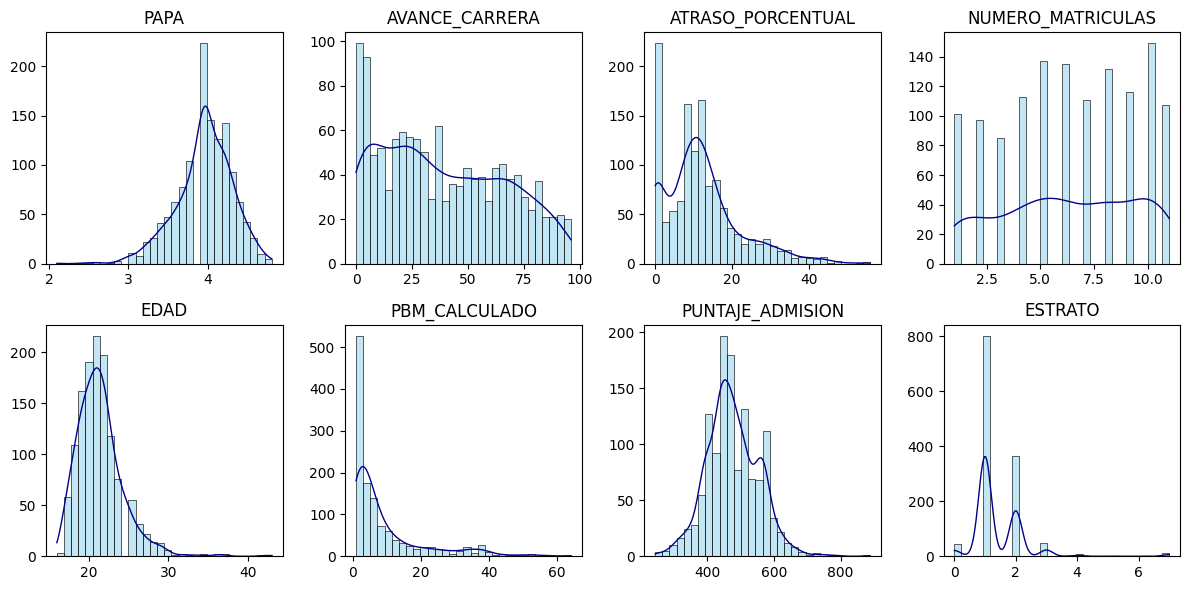

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset imputado
df = pd.read_excel("df_objetivo/df_objetivo_imputado.xlsx")

# Lista de variables numéricas analizadas
variables_numericas = [
    "PAPA",  "AVANCE_CARRERA", "ATRASO_PORCENTUAL",
    "NUMERO_MATRICULAS", "EDAD",
    "PBM_CALCULADO", "PUNTAJE_ADMISION", "ESTRATO"
]

# Crear una figura con 2 filas y 4 columnas de subplots
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

for i, var in enumerate(variables_numericas):
    row = i // 4
    col = i % 4
    sns.histplot(df[var], bins=30, kde=True, ax=axs[row, col], color='skyblue')
    axs[row, col].lines[0].set_color('darkblue')
    axs[row, col].lines[0].set_linestyle('-')
    axs[row, col].lines[0].set_linewidth(1)
    axs[row, col].set_title(f'{var}')
    axs[row, col].set_ylabel('')  
    axs[row, col].set_xlabel('')  

plt.tight_layout()
plt.show()

